# PyMongo Query

db = "test"
collection = "benchmarklogs"

In [1]:
from pymongo import MongoClient
client = MongoClient()

db = client['test']
collection = db['benchmarklogs']

# PyMongo Query ->Pandas DataFrame

In [2]:
import numpy as np
import pandas as pd

query = {"$and":[ {"$or":[{"instanceType":"c5.large"},{"instanceType":"t2.xlarge"},{"instanceType":"c5.xlarge"},{"instanceType":"c5.2xlarge"},{"instanceType":"c5.4xlarge"}]}, 
        {"usedGenesisJson":"genesis_poa_max_performance.json"}, {"maxTransactions": 1000}, {"scenario":"account"}, {"nodes":5}]}

# query = {}

# Make a query to the specific DB and Collection
cursor = collection.find(query)

# Expand the cursor and construct the DataFrame
df = pd.DataFrame(list(cursor))

#display(df.head(200))

# Pandas DataFrame -> Plot
## Throughput

In [3]:
import matplotlib.pyplot as plt

data_tps_instanceType = df[['txPerSecond','instanceType']]
data_hashRate_instanceType = df[['hashRate','instanceType']]

title = "Throughput against Node Configuration (PoA)"
xlabel = "Node Configuration"
ylabel = "Transactions Per Second (TPS)"
ylabelAverage = "Average Transactions Per Second (TPS)"

avg1_tps = data_tps_instanceType.loc[df['instanceType'] == "c5.large"].iloc[:,0].mean()
avg2_tps = data_tps_instanceType.loc[df['instanceType'] == "c5.xlarge"].iloc[:,0].mean()
avg3_tps = data_tps_instanceType.loc[df['instanceType'] == "t2.xlarge"].iloc[:,0].mean()
avg4_tps = data_tps_instanceType.loc[df['instanceType'] == "c5.2xlarge"].iloc[:,0].mean()
avg5_tps = data_tps_instanceType.loc[df['instanceType'] == "c5.4xlarge"].iloc[:,0].mean()

hashRate1 = data_hashRate_instanceType.loc[df['instanceType'] == "c5.large"].iloc[:,0].mean()
hashRate2 = data_hashRate_instanceType.loc[df['instanceType'] == "c5.xlarge"].iloc[:,0].mean()
hashRate3 = data_hashRate_instanceType.loc[df['instanceType'] == "t2.xlarge"].iloc[:,0].mean()
hashRate4 = data_hashRate_instanceType.loc[df['instanceType'] == "c5.2xlarge"].iloc[:,0].mean()
hashRate5 = data_hashRate_instanceType.loc[df['instanceType'] == "c5.4xlarge"].iloc[:,0].mean()

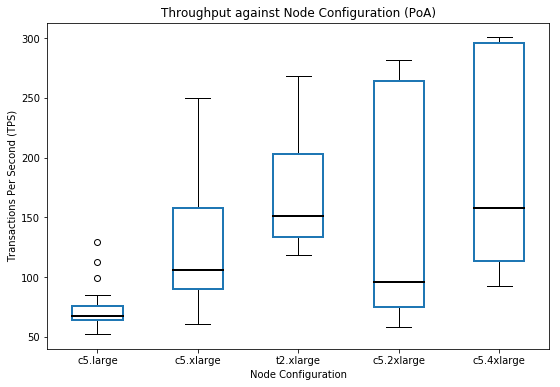

In [4]:
color_latency="#ff7f0e"
color_tps="#1f77b4"
objects = ('c5.large', 'c5.xlarge', 't2.xlarge', 'c5.2xlarge', 'c5.4xlarge')

fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

# Create the boxplot

## combine these different collections into a list    
data_to_plot = [data_tps_instanceType.loc[df['instanceType'] == "c5.large"].iloc[:,0],
                data_tps_instanceType.loc[df['instanceType'] == "c5.xlarge"].iloc[:,0],
                data_tps_instanceType.loc[df['instanceType'] == "t2.xlarge"].iloc[:,0],
                data_tps_instanceType.loc[df['instanceType'] == "c5.2xlarge"].iloc[:,0],
                data_tps_instanceType.loc[df['instanceType'] == "c5.4xlarge"].iloc[:,0]]

bp = ax.boxplot(data_to_plot,labels=objects, patch_artist=True) 

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color=color_tps, linewidth=2)
    # change fill color
    box.set( facecolor = 'w' )
    
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color="k", linewidth=2) 
    
fig.savefig("nodes_configuration_poa_throughput_boxplot.svg", format="svg")



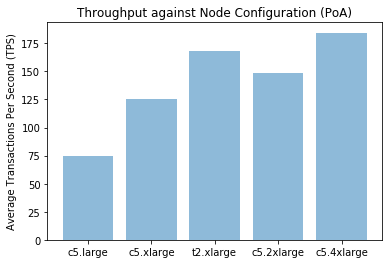

In [5]:
y_pos = np.arange(len(objects))
performance = [avg1_tps,avg2_tps,avg3_tps,avg4_tps,avg5_tps]
 
plt.bar(y_pos, performance, align='center', alpha=0.5, color=color_tps)
plt.xticks(y_pos, objects)
plt.ylabel(ylabelAverage)
plt.title(title)
plt.savefig("nodes_configuration_poa_throughput_barchart.svg", format="svg")
plt.show()

## Latency

In [6]:
data_latency_instanceType = df[['averageDelay','instanceType']]
data_hashRate_instanceType = df[['hashRate','instanceType']]

title = "Latency against Node Configuration (PoA)"
xlabel = "Node Configuration"
ylabel = "Transaction Latency [seconds]"
ylabelAverage = "Average Transaction Latency [seconds]"


avg1_latency = data_latency_instanceType.loc[df['instanceType'] == "c5.large"].iloc[:,0].mean()
avg2_latency = data_latency_instanceType.loc[df['instanceType'] == "c5.xlarge"].iloc[:,0].mean()
avg3_latency = data_latency_instanceType.loc[df['instanceType'] == "t2.xlarge"].iloc[:,0].mean()
avg4_latency = data_latency_instanceType.loc[df['instanceType'] == "c5.2xlarge"].iloc[:,0].mean()
avg5_latency = data_latency_instanceType.loc[df['instanceType'] == "c5.4xlarge"].iloc[:,0].mean()

hashRate1 = data_hashRate_instanceType.loc[df['instanceType'] == "c5.large"].iloc[:,0].mean()
hashRate2 = data_hashRate_instanceType.loc[df['instanceType'] == "c5.xlarge"].iloc[:,0].mean()
hashRate3 = data_hashRate_instanceType.loc[df['instanceType'] == "t2.xlarge"].iloc[:,0].mean()
hashRate4 = data_hashRate_instanceType.loc[df['instanceType'] == "c5.2xlarge"].iloc[:,0].mean()
hashRate5 = data_hashRate_instanceType.loc[df['instanceType'] == "c5.4xlarge"].iloc[:,0].mean()

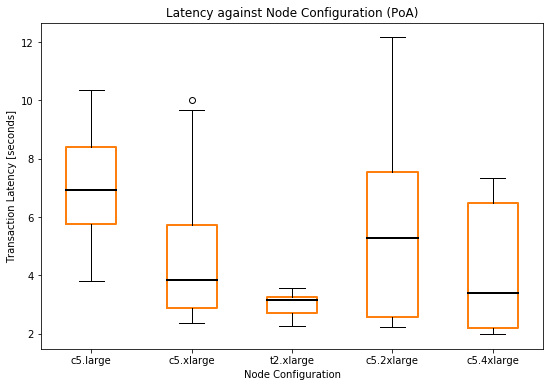

In [7]:
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

# Create the boxplot

## combine these different collections into a list    
data_to_plot = [data_latency_instanceType.loc[df['instanceType'] == "c5.large"].iloc[:,0],
                data_latency_instanceType.loc[df['instanceType'] == "c5.xlarge"].iloc[:,0],
                data_latency_instanceType.loc[df['instanceType'] == "t2.xlarge"].iloc[:,0],
                data_latency_instanceType.loc[df['instanceType'] == "c5.2xlarge"].iloc[:,0],
                data_latency_instanceType.loc[df['instanceType'] == "c5.4xlarge"].iloc[:,0]]

bp = ax.boxplot(data_to_plot,labels=objects)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color=color_latency, linewidth=2)
    # change fill color
    #box.set( facecolor = 'w' )
    
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color="k", linewidth=2) 
    
fig.savefig("nodes_configuration_poa_latency_boxplot.svg", format="svg")

In [ ]:
objects = ('c5.large', 'c5.xlarge', 't2.xlarge', 'c5.2xlarge', 'c5.4xlarge')
y_pos = np.arange(len(objects))
performance = [avg1_latency,avg2_latency,avg3_latency,avg4_latency,avg5_latency]
 
plt.bar(y_pos, performance, align='center', alpha=0.5, color=color_latency)
plt.xticks(y_pos, objects)
plt.ylabel(ylabelAverage)
plt.title(title)
plt.savefig("nodes_configuration_poa_latency_barchart.svg", format="svg")
plt.show()

## Througput and Latency Combined

In [ ]:
means_tps = [avg1_tps, avg2_tps, avg3_tps, avg4_tps, avg5_tps]
means_latency = [avg1_latency, avg2_latency, avg3_latency, avg4_latency, avg5_latency]

df = pd.DataFrame({'Average Throughput [TPS]':means_tps, 'Average Latency [seconds]':means_latency})
print(df)

fig = plt.figure()
ax = df.plot( kind= 'bar' , color=tuple([color_tps, color_latency]), secondary_y= ['Average Latency [seconds]'] ,mark_right=True,ylim=(0, 240), use_index=False)
ax.set_xticklabels(objects)
ax.set_title('Throughput and Latency against Node Configuration (PoA)')
ax.figure.savefig("nodes_configuration_poa_combined_barchart.svg", format="svg",bbox_inches='tight')
plt.show()